In [2]:
import pandas as pd
import numpy as np
import warnings
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


dataset=load_breast_cancer()

X_features=dataset.data
y_label=dataset.target

cancer_df=pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)

In [4]:
dtrain=xgb.DMatrix(data=X_train, label=y_train)
dtest=xgb.DMatrix(data=X_test, label=y_test)

params={'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss'}
num_rounds=400

In [5]:
wlist=[(dtrain,'train'),(dtest,'eval')]
xgb_model=xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	train-logloss:0.11729	eval-logloss:0.16766
[20]	train-logloss:0.10969	eval-logloss:0.15820
[2

[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:0.00687	eval-logloss:0.08683
[183]	train-logloss:0.00685	eval-logloss:0.08658
[184]	train-logloss:0.00683	eval-logloss:0.08659
[185]	train-logloss:0.00681	eval-logloss:0.08661
[186]	train-logloss:0.00680	eval-logloss:0.08637
[187]	train-logloss:0.00678	eval-logloss:0.08637
[188]	train-logloss:0.00676	eval-logloss:0.08630
[189]	train-logloss:0.00675	eval-logloss:0.08610
[190]	train-logloss:

In [6]:
pred_probs=xgb_model.predict(dtest)
print('predict()수행 결과값을 10개만 표시, 에측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시 : ', preds[:10])

predict()수행 결과값을 10개만 표시, 에측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시 :  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [8]:
def get_clf_eval(y_test,pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test,pred)
    confusion = confusion_matrix(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    print("정확도 : {0:.5f}, 정밀도 : {1:.5f}, 재현율 : {2:.5f}, f1:{3:.5f}, auc:{4:.5f}".format(accuracy,precision,recall,f1, roc_auc))

In [9]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.97368, 정밀도 : 0.97436, 재현율 : 0.98701, f1:0.98065, auc:0.99509


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

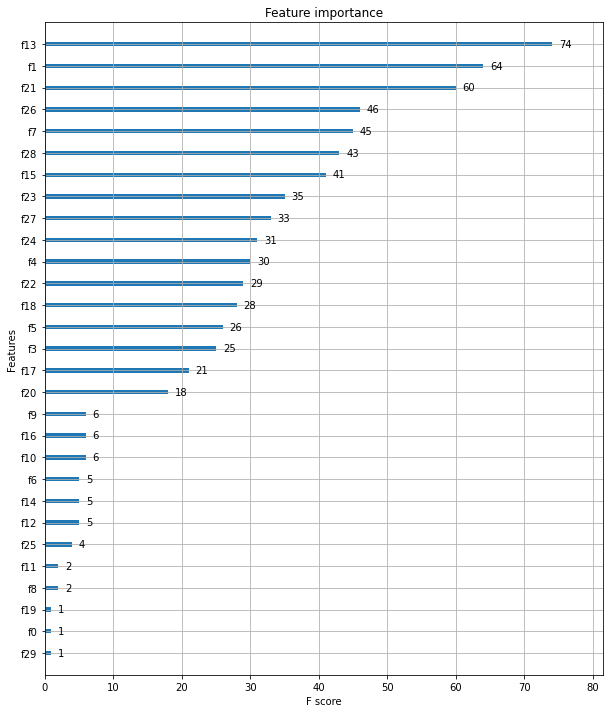

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [11]:
from xgboost import XGBClassifier

xgb_wrapper=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds=xgb_wrapper.predict(X_test)
w_pred_proba=xgb_wrapper.predict_proba(X_test)[:, 1]

[01:35:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [12]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도 : 0.97368, 정밀도 : 0.97436, 재현율 : 0.98701, f1:0.98065, auc:0.99509


In [13]:
from xgboost import XGBClassifier

xgb_wrapper_classifier=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test, y_test)]
xgb_wrapper_classifier.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)
w10_preds=xgb_wrapper_classifier.predict(X_test)
w10_pred_proba=xgb_wrapper_classifier.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [14]:
get_clf_eval(y_test, w10_preds, w10_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도 : 0.95614, 정밀도 : 0.96154, 재현율 : 0.97403, f1:0.96774, auc:0.99473


In [15]:

xgb_wrapper_classifier=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test, y_test)]
xgb_wrapper_classifier.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
w100_preds=xgb_wrapper_classifier.predict(X_test)
w100_pred_proba=xgb_wrapper_classifier.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[81]	validation_0-logloss:0.08741
[82]	validation_0-logloss:0.08849
[83]	validation_0-logloss:0.08858
[84]	validation_0-logloss:0.08807
[85]	validation_0-logloss:0.08764
[86]	validation_0-logloss:0.08742
[87]	validation_0-logloss:0.08761
[88]	validation_0-logloss:0.08707
[89]	validation_0-logloss:0.08727
[90]	validation_0-logloss:0.08716
[91]	validation_0-logloss:0.08696
[92]	validation_0-logloss:0.08717
[93]	validation_0-logloss:0.08707
[94]	validation_0-logloss:0.08659
[95]	validation_0-logloss:0.08612
[96]	validation_0-logloss:0.08714
[97]	validation_0-logloss:0.08677
[98]	validation_0-logloss:0.08669
[99]	validation_0-logloss:0.08655
[100]	validation_0-logloss:0.08650
[101]	validation_0-logloss:0.08641
[102]	validation_0-logloss:0.08629
[103]	validation_0-logloss:0.08626
[104]	validation_0-logloss:0.08683
[105]	validation_0-logloss:0.08677
[106]	validation_0-logloss:0.08732
[107]	validation_0-logloss:0.08730
[108]	validation_0-logloss:0.08728
[109]	validation_0-logloss:0.08730
[110

In [16]:
get_clf_eval(y_test, w100_preds, w100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도 : 0.96491, 정밀도 : 0.96203, 재현율 : 0.98701, f1:0.97436, auc:0.99544


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

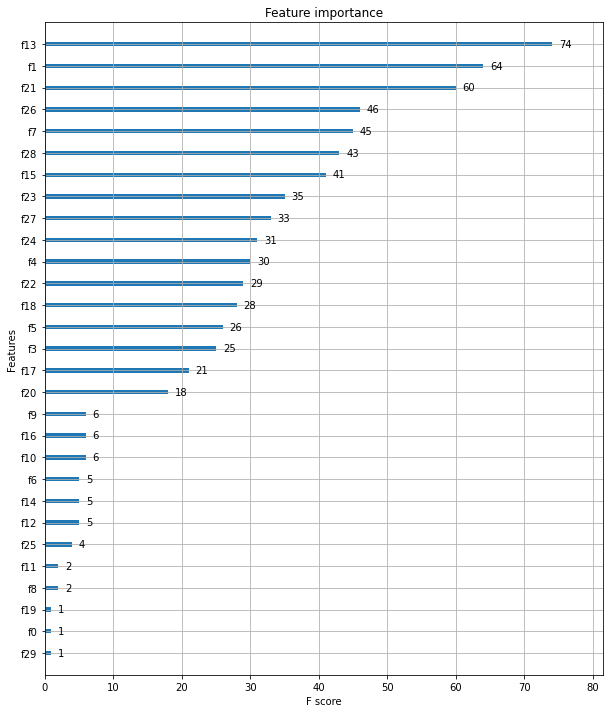

In [17]:
fig, ax=plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper_classifier, ax=ax)

In [18]:
from sklearn.model_selection import cross_validate

In [20]:
cross_val=cross_validate(estimator=xgb_wrapper_classifier, X=X_features, y=y_label, cv=5)
print(cross_val['test_score'])
print('avg test score : {0:.4f} (+/-{1:.4f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

C:\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [21]:
from sklearn.datasets import load_boston

dataset=load_boston()
X_features=dataset.data
y_label=dataset.target

cancer_df=pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [22]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2, random_state=156)

In [25]:
from xgboost import XGBRegressor


In [26]:

xgb_wrapper_regressor=XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective='reg:squarederror')
xgb_wrapper_regressor.fit(X_train, y_train)
w_preds=xgb_wrapper_regressor.predict(X_test)

In [27]:
cross_val=cross_validate(estimator=xgb_wrapper_regressor, X=X_features, y=y_label, cv=5)
print(cross_val['test_score'])
print('avg test score :  {0:.4f} (+/-{1:.4f})'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

[0.78394647 0.83822744 0.82128974 0.58716097 0.41157075]
avg test score :  0.6884 (+/-0.1650)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

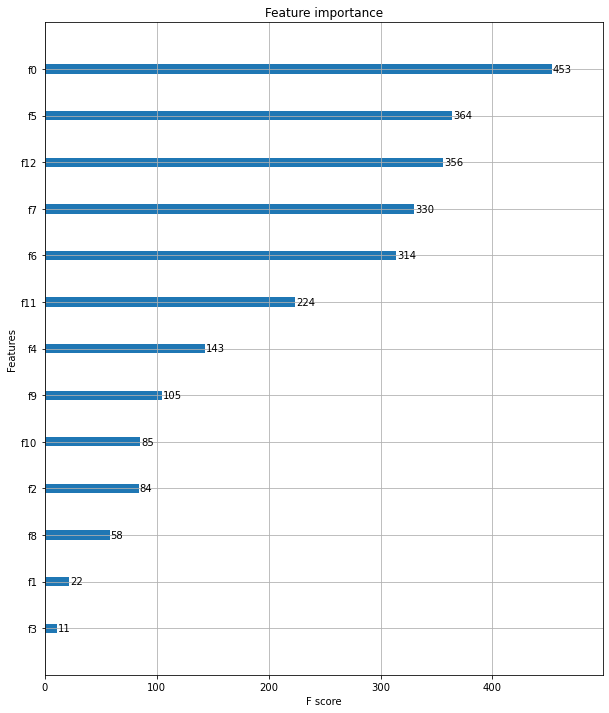

In [28]:
fig, ax=plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper_regressor, ax=ax)

In [30]:
pip install lightgbm

  Using cached lightgbm-3.1.1-py2.py3-none-win_amd64.whl (754 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\anaconda\python.exe -m pip install --upgrade pip' command.


In [31]:
import lightgbm as lgbm

In [32]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric, plot_tree

In [33]:
dataset=load_breast_cancer()
ftr=dataset.data
target=dataset.target

In [34]:
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156)

In [35]:
lgbm_wrapper_classifier=LGBMClassifier(n_estimators=400)
evals=[(X_test, y_test)]
lgbm_wrapper_classifier.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=evals, verbose=True)
preds=lgbm_wrapper_classifier.predict(X_test)
pred_prob=lgbm_wrapper_classifier.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [36]:
get_clf_eval(y_test, preds, pred_prob)

오차 행렬
[[33  4]
 [ 1 76]]
정확도 : 0.95614, 정밀도 : 0.95000, 재현율 : 0.98701, f1:0.96815, auc:0.99052


In [37]:
cross_val=cross_validate(estimator=lgbm_wrapper_classifier, X=ftr, y=target, cv=5)

print(cross_val['test_score'])
print('avg test score : {0:.4f} (+/-{1:.4f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[0.94736842 0.96491228 0.99122807 0.98245614 0.98230088]
avg test score : 0.9737 (+/-0.0157)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

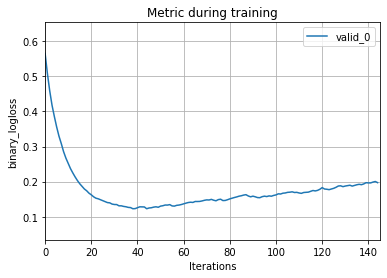

In [38]:
plot_metric(lgbm_wrapper_classifier)

In [39]:
from lightgbm import LGBMRegressor

In [40]:
dataset=load_boston()
ftr=dataset.data
target=dataset.target

X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156)

lgbm_wrapper_regressor=LGBMRegressor(n_estimators=400)
evals=[(X_test, y_test)]
lgbm_wrapper_regressor.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',eval_set=evals, verbose=True)
preds=lgbm_wrapper_regressor.predict(X_test)

[1]	valid_0's l2: 72.5365
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 61.3514
[3]	valid_0's l2: 53.0598
[4]	valid_0's l2: 45.4622
[5]	valid_0's l2: 39.5661
[6]	valid_0's l2: 34.3286
[7]	valid_0's l2: 30.2608
[8]	valid_0's l2: 26.6953
[9]	valid_0's l2: 23.9703
[10]	valid_0's l2: 21.7321
[11]	valid_0's l2: 19.7121
[12]	valid_0's l2: 18.1262
[13]	valid_0's l2: 16.8725
[14]	valid_0's l2: 15.7044
[15]	valid_0's l2: 14.7925
[16]	valid_0's l2: 14.0746
[17]	valid_0's l2: 13.4114
[18]	valid_0's l2: 12.7795
[19]	valid_0's l2: 12.3396
[20]	valid_0's l2: 11.8605
[21]	valid_0's l2: 11.5041
[22]	valid_0's l2: 11.239
[23]	valid_0's l2: 10.9851
[24]	valid_0's l2: 10.7908
[25]	valid_0's l2: 10.5489
[26]	valid_0's l2: 10.222
[27]	valid_0's l2: 9.98585
[28]	valid_0's l2: 9.8718
[29]	valid_0's l2: 9.74712
[30]	valid_0's l2: 9.53602
[31]	valid_0's l2: 9.46362
[32]	valid_0's l2: 9.31195
[33]	valid_0's l2: 9.16956
[34]	valid_0's l2: 9.08825
[35]	valid_0's l2: 9.07406
[36]	

In [41]:
cross_val=cross_validate(estimator=lgbm_wrapper_regressor, X=ftr, y=target, cv=5)
print(cross_val['test_score'])
print('avg test score : {0:.4f} (+/-{1:.4f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[0.73551531 0.80257021 0.78554793 0.5047667  0.01783397]
avg test score : 0.5692 (+/-0.2957)


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

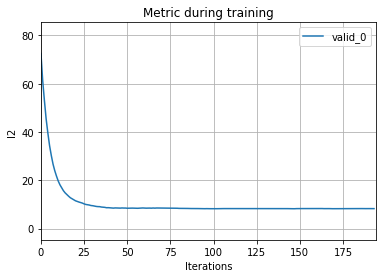

In [42]:
plot_metric(lgbm_wrapper_regressor)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

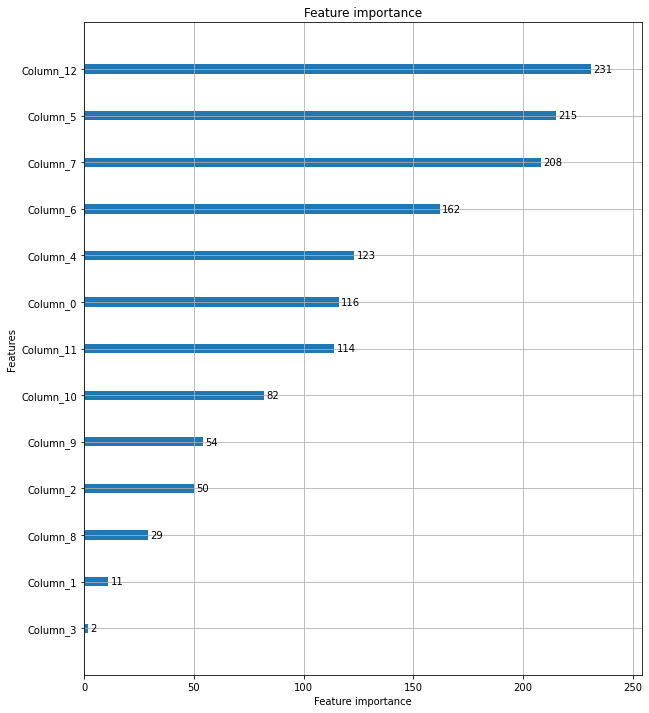

In [43]:
fig, ax=plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper_regressor, ax=ax)